In [1]:
# Too work with arguments and script paths
import sys

# scientific libraries and utilities
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

# GA library
from deap import base
from deap import creator
from deap import tools

# Visualization tools
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import gridplot, column
from bokeh.layouts import row as layout_row
from bokeh.models.annotations import Arrow, Label
from bokeh.models.arrow_heads import OpenHead, NormalHead, VeeHead
from bokeh.models import ColumnDataSource, Div, Whisker, Span, Range1d
from bokeh.io import export_svgs, export_png

# XML tools
import xml.etree.ElementTree as ET

# Display useful loading of bokeh library and start timer
output_notebook()
t0 = time.time()

sys.path.append('..')

Loading BokehJS ...

In [2]:
# 1. Specify instance name
instanceName = 'd1c7cs2_ev2'

# 2. Specify file and folder paths
folderPath = '../data/GA_implementation_xml/'+instanceName+'/'
filePath = folderPath+instanceName+'.xml'
print('Opening:', filePath)

# 3. Open XML file
tree = ET.parse(filePath)
_info = tree.find('info')
_network = tree.find('network')
_fleet = tree.find('fleet')

Opening: ../data/GA_implementation_xml/d1c7cs2_ev2/d1c7cs2_ev2.xml


In [3]:
# 4. Store data
from res.Node import DepotNode, CustomerNode, ChargeStationNode

# [START Node data]
_nodes = _network.find('nodes')
_edges = _network.find('edges')
_technologies = _network.find('technologies')

nodes = []
for _node in _nodes:
    node_type = _node.get('type')
    id_node = int(_node.get('id'))
    pos = (float(_node.get('cx')), float(_node.get('cy')))
    if node_type == '0':
        node = DepotNode(id_node, pos=pos)
    
    elif node_type == '1':
        tw_upp = float(_node.get('tw_upp'))
        tw_low = float(_node.get('tw_low'))
        demand = float(_node.get('request'))
        spent_time = float(_node.get('spent_time'))
        node = CustomerNode(id_node, spent_time, demand, tw_upp, tw_low, pos=pos)
    
    elif node_type == '2':
        index_technology = int(_node.get('technology')) - 1
        _technology = _technologies[index_technology]
        charging_times = []
        battery_levels = []
        for _bp in _technology:
            charging_times.append(float(_bp.get('charging_time')))
            battery_levels.append(float(_bp.get('battery_level')))
        capacity = _node.get('capacity')
        node = ChargeStationNode(id_node, capacity, charging_times, battery_levels, pos=pos)
    
    nodes.append(node)

networkSize = len(nodes)

print('There are', networkSize, 'nodes in the network.')

# [END Node data]

There are 10 nodes in the network.


In [4]:
# [START Edge data]
id_nodes = [x.id for x in nodes]
timeMatrix = np.zeros((networkSize, networkSize))
energyMatrix = np.zeros((networkSize, networkSize))
coordinates = {}

for i, nodeFrom in enumerate(_edges):
    for j, nodeTo in enumerate(nodeFrom):
        timeMatrix[i][j] = float(nodeTo.get('travel_time'))
        energyMatrix[i][j] = float(nodeTo.get('energy_consumption'))
    coordinates[i] = nodes[i].pos

# Show stored values
print('NODES IDSs:\n', id_nodes)
print('RESULTING TIME MATRIX:\n', timeMatrix)
print('RESULTING ENERGY CONSUMPTION MATRIX:\n', energyMatrix)
print('RESULTING NODES COORDINATES:\n',coordinates)
# [END Edge data]

NODES IDSs:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RESULTING TIME MATRIX:
 [[ 0.   24.24 20.82 24.97 34.37 25.52 20.8  24.44 26.02  9.16]
 [18.98  0.   24.71 21.16 10.42  4.31  6.6   6.01 13.29 19.1 ]
 [ 3.52 17.72  0.   18.36 28.07  3.58  8.98  5.31 20.19 27.39]
 [ 8.1  12.55 26.55  0.   16.51 16.86 11.97 17.49 15.71 23.92]
 [22.42  7.42 10.73 32.82  0.   32.45 25.53 10.63 27.17 20.9 ]
 [ 9.54 18.38 11.6  30.97 17.13  0.    3.91 33.93 20.84  9.23]
 [10.18 22.79  7.27  9.18  4.33 13.57  0.   32.74 21.15 13.85]
 [18.97  3.7   3.97 22.76 14.96 28.36 26.3   0.   29.5  18.23]
 [22.21 23.99  6.83 11.52 19.88 34.67  9.65  8.86  0.   24.87]
 [16.5  22.67  3.93  4.58  7.01 26.74  8.43 19.66  6.63  0.  ]]
RESULTING ENERGY CONSUMPTION MATRIX:
 [[0.   5.73 6.03 6.38 2.33 3.05 4.08 9.59 8.54 5.71]
 [4.41 0.   6.05 4.57 8.56 9.6  6.46 9.18 3.71 9.13]
 [6.37 8.42 0.   3.15 7.1  6.33 2.26 3.27 4.35 5.45]
 [9.91 7.35 2.64 0.   6.8  8.98 7.24 5.18 8.15 6.18]
 [5.35 5.56 7.54 2.74 0.   6.1  8.33 6.   3.96 6.48

C:\Users\jpfut\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\jpfut\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


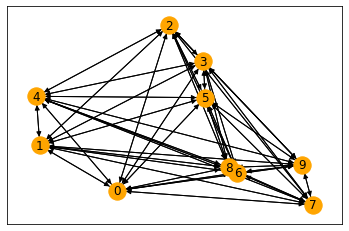

energy_consumption : 8.33


In [9]:
# 5. Instance Network
from res.Network import Network
net = Network(nodes, timeMatrix, energyMatrix)
net.draw()

# Usage example
f = 5
t = 6
key = 'energy_consumption'
print(key, net[f][t][key])

In [4]:
# 6. Instance EVs
import res.EV

